In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loop through each league folder in Football-Dataset folder

# assign directory
directory = 'Football-Dataset'
leagues = []
 
# iterate over folders in Football-Dataset directory
for folder in os.listdir(directory):
    leagues.append(folder)

leagues

['ligue_1',
 'championship',
 'eerste_divisie',
 'ligue_2',
 'premier_league',
 'eredivisie',
 'primera_division',
 'primeira_liga',
 'segunda_division',
 'segunda_liga',
 'serie_b',
 'bundesliga',
 'serie_a',
 '2_liga']

In [37]:
league = 'premier_league'

for year in range(1990, 2021):
    results_table = pd.read_csv(f"Football-Dataset/{league}/Results_{year}_{league}.csv")
    results_table = win_loss_draw(results_table)

    full_results_table =pd.concat([full_results_table, results_table])

full_results_table


,Home_Team,Away_Team,Result,Link,Season,Round,League,Home_Goals,Away_Goals,Label
0,Charlton Athletic,Derby County,0-0,https://www.besoccer.com/match/charlton-athlet...,1990,1,premier_league,0,0,0
1,Tottenham Hotspur,Luton Town,2-1,https://www.besoccer.com/match/tottenham-hotsp...,1990,1,premier_league,2,1,1
2,Southampton,Millwall,1-2,https://www.besoccer.com/match/southampton-fc/...,1990,1,premier_league,1,2,-1
3,Sheffield Wednesday,Norwich City,0-2,https://www.besoccer.com/match/sheffield-wedne...,1990,1,premier_league,0,2,-1
4,Queens Park Rangers,Crystal Palace,2-0,https://www.besoccer.com/match/queens-park-ran...,1990,1,premier_league,2,0,1
...,...,...,...,...,...,...,...,...,...,...
375,Leicester,Man. Utd,0-2,https://www.besoccer.com/match/leicester-city-...,2020,38,premier_league,0,2,-1
376,Man. City,Norwich City,5-0,https://www.besoccer.com/match/manchester-city...,2020,38,premier_league,5,0,1
377,Newcastle,Liverpool,1-3,https://www.besoccer.com/match/newcastle-unite...,2020,38,premier_league,1,3,-1
378,Southampton,Sheffield United,3-1,https://www.besoccer.com/match/southampton-fc/...,2020,38,premier_league,3,1,1


<AxesSubplot:title={'center':'premier_league'}, xlabel='Season', ylabel='count'>

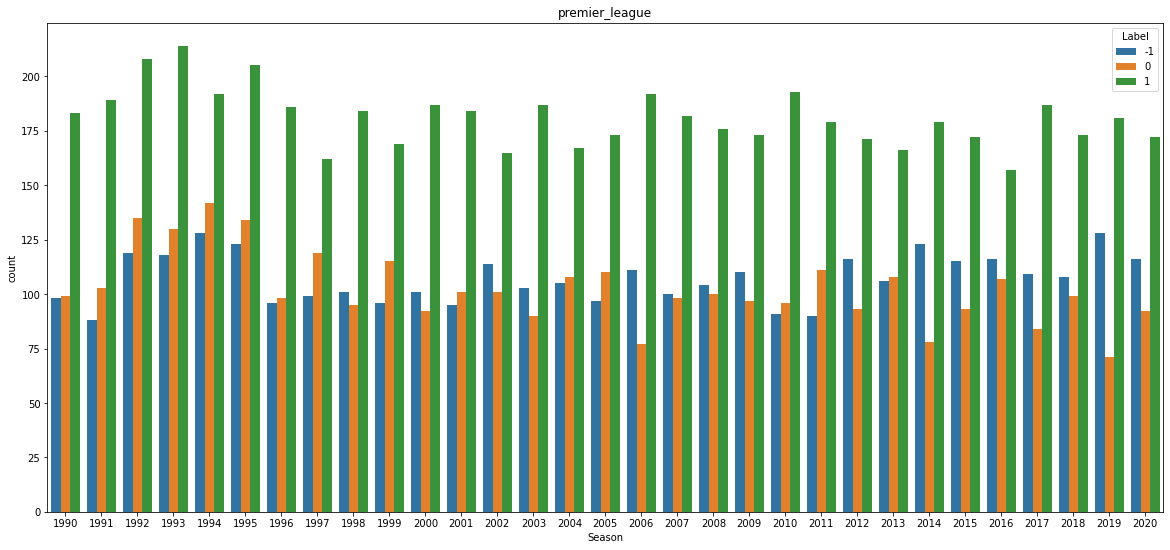

In [43]:
import seaborn as sns
plt.figure(figsize=(20,9))
plt.title(f"{league}")

sns.countplot(x='Season', data=full_results_table, hue='Label')

In [30]:
def home_away_goals(results_table):
    '''
    Adds Home_Goals and Away_Goals columns to dataframe. Uses the Results column and inputs 
    values for number of home goals and away goals for each match for given results_table. 

    Args
    ----------
    results_table: pandas.core.frame.DataFrame
        Dataframe of match results containing the Home_Team, Away_Team, Result, Link, Season,
        Round, League (and more).

    Returns
    -------
    results_table: pandas.core.frame.DataFrame
        Input results_table with additional columns stating the number of Home and Away goals.
    '''

    home_result = []
    away_result = []

    # iterate through each value in Result column and splits into home and away goals
    for results in results_table["Result"]:
        home_result.append(int(results[:results.find('-')]))
        away_result.append(int(results[results.find('-')+1:]))

    # create new columns Home_Goals and Away_Goals
    results_table["Home_Goals"] = home_result
    results_table["Away_Goals"] = away_result
    
    return results_table

def win_loss_draw(results_table):
    '''
    Adds Label column to results_table which dictates if match result was Home Win, Away Win
    or a Draw.

    *IMPORTANT* Requires Home_Goals and Away_Goals columns in input results_table which can be 
    generated using the home_away_goals function. (This function will automatically run the home_away_goals 
    function on input results_table if Home_Goals and Away_Goals columns not found).
    Args

    Args
    ----------
    results_table: pandas.core.frame.DataFrame
        Dataframe of match results containing the Home_Team, Away_Team, Result, Link, Season,
        Round, League (and more).

    Returns
    -------
    results_table: pandas.core.frame.DataFrame
        Input results_table with additional columns stating the number of Home and Away goals.
    '''

    # if Home_Goals and Away_Goals columns are not in the results_table, generate them here
    if "Home_Goals" and "Away_Goals" not in results_table:
        home_away_goals(results_table)

    #define conditions for win or loss
    conditions = [results_table["Home_Goals"] > results_table["Away_Goals"], 
                results_table["Home_Goals"] < results_table["Away_Goals"]]

    # define choices : 1-Home Win, -1-Away Win, 0-Draw
    choices = [1, -1]

    #create new column in DataFrame that displays results of comparisons
    results_table["Label"] = np.select(conditions, choices, default=0)

    return results_table